In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.bak/epoch/model.cpkt-10-12750', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model.v0/bow.basic/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')
flags.DEFINE_bool('feed_single_', True, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=50)
  #print('text_ids', text_ids)
  
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #scores = predictor.inference('text_words_emb_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    #score = predictor.inference(['text_emb_sim'], 
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids],
                                      'bow/main/text2:0': [text2_ids]
                                      })
    print(score[0][0])
    return score[0][0]

  #print('words', words)
  argmax_encode = predictor.inference(['words_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-155.3-198000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-155.3-198000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-155.3-198000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v/model.ckpt-155.3-198000


In [7]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [8]:
top_words('高铁')
top_words('美女')

铁:0.850549 动车:0.398985 高:0.388661 13805194935:0.325612 威马:0.308474 整洁:0.276858 通票:0.271667 大亚湾:0.267590 未央:0.262127 想飞:0.257021 占:0.254302 加2:0.253005 既然:0.250337 印象:0.250006 跳水:0.249931 乘务:0.246949 明火:0.244161 钢轨:0.239837 毫升:0.238911 座:0.238292 蛳:0.234831 仙林:0.232037 young:0.231066 亩:0.230814 洪:0.230231 香溪:0.229061 箍筋:0.229039 面馆:0.227671 放松:0.227655 豪瑞:0.227581 整改:0.227155 b2:0.225874 华大:0.225666 现购:0.223607 邮包:0.223463 达康:0.221930 润格:0.221395 永源:0.220743 处:0.220658 授予:0.220423 换钱:0.219225 网架:0.219182 李沧:0.219034 新城:0.219018 197:0.218952 i:0.218674 25000:0.218205 接送:0.217902 铜棒:0.217662 堰:0.217482 乍:0.216646 鸿福:0.216206 井队:0.216059 玫瑰:0.214967 回转:0.214432 金贝:0.213754 汴:0.212979 京南:0.212959 猎人:0.212909 惦:0.212867 名流:0.212759 座位:0.212620 六盘水:0.212094 送您:0.211582 派发:0.211490 府邸:0.211487 麦卡仑:0.211465 戍:0.210465 合页:0.210414 起价:0.210098 pe管:0.209831 高斯:0.209201 勘查:0.209131 组件:0.209069 天禧:0.208977 钢丝:0.208885 展博:0.208862 蘑:0.208861 iht:0.208715 蚌:0.208688 6900:0.208633 舱:0.208323 双高:0.20825

In [9]:
top_words('墨镜')

墨镜:1.000000 黄皮:0.354371 气场:0.339936 轻便:0.330423 柑:0.330284 皮靴:0.327892 色斑:0.325590 人手:0.325425 粉底:0.321233 普茶:0.319771 受潮:0.316174 轻盈:0.313906 长腿:0.311180 脸蛋:0.306313 血剑:0.303839 loho:0.297434 绞股蓝:0.295813 谨记:0.294762 干枯:0.292289 镜片:0.290502 水嫩:0.289208 镜架:0.288832 村:0.287260 洁面:0.286381 宰:0.285411 麽:0.282855 伴侣:0.280884 珍惜:0.280016 审核:0.278660 东西:0.275981 换季:0.275107 春光:0.275000 轻薄:0.274692 渐变:0.273718 个子:0.272935 air:0.272650 笑:0.271743 手机:0.271654 富人:0.269401 失灵:0.269224 圆珠:0.268365 上身:0.268170 小气:0.268159 艰辛:0.267892 大幅:0.267674 古风:0.267358 送友:0.266363 必备:0.266273 副:0.266162 茶叶:0.265269 杏花:0.264291 239:0.264277 过敏:0.263709 开车:0.263562 秀发:0.262100 男士:0.261597 债:0.261315 飘:0.260122 钱包:0.259914 想说:0.259755 送亲:0.259701 易:0.258647 清仓:0.257848 触控:0.257644 三泰:0.257643 弥:0.256704 顾虑:0.256570 卖价:0.256540 求爱:0.256504 app:0.256107 划痕:0.255548 好车:0.255299 纯银:0.255279 手持式:0.254863 脸部:0.253983 海参:0.253233 辟:0.253004 季节:0.252946 黍:0.252931 烦人:0.252655 手包:0.252525 搭讪:0.252369 蓝花:0.251854 奥秘:0.2517

In [10]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

[ 1.00000024]
[ 0.52948809]
[ 0.52557838]


array([ 0.52557838], dtype=float32)

argmax_encode [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [1.0] 1.0 1
美女


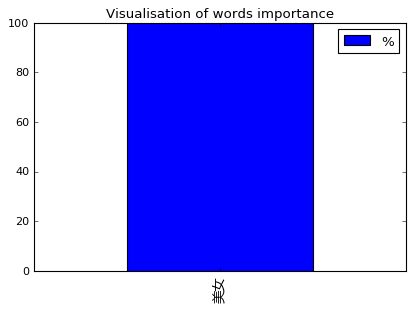

argmax_encode [[ 0.52948809  0.59169352  0.52557832  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.52948809, 0.59169352, 0.52557832] 1.64676 3
帅哥戴墨镜


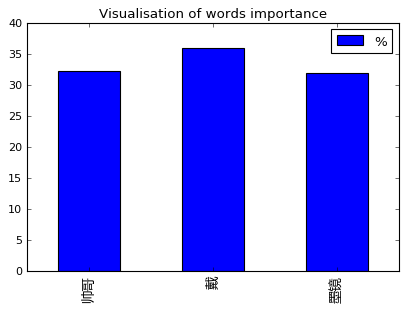

argmax_encode [[ 0.31011936  0.51143682  0.03397251  0.1159355   0.07258748  0.461943
   0.0581296   0.11719441  0.27618071  0.0581296   0.38417262  0.17056799
   0.0581296   0.15791112  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.31011936, 0.51143682, 0.033972509, 0.1159355, 0.072587475, 0.461943, 0.058129605, 0.11719441, 0.27618071, 0.058129605, 0.38417262, 0.17056799, 0.058129605, 0.15791112] 2.78641 14
初中孩子的免费精品课，用手机，在家上，省心


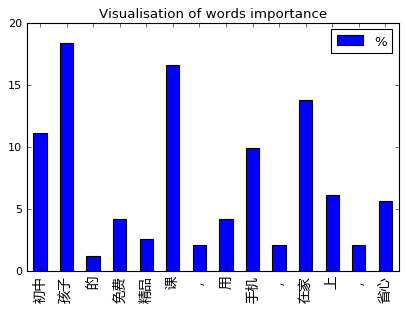

argmax_encode [[ 0.09759495  0.24696195  0.30699092  0.30061212  0.17316464  0.36516953
   0.18432645  0.39235544 -0.04866074  0.23531581  0.13146132  0.14968142
   0.22408411  0.36516953  0.10323754  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.097594954, 0.24696195, 0.30699092, 0.30061212, 0.17316464, 0.36516953, 0.18432645, 0.39235544, 0, 0.23531581, 0.13146132, 0.14968142, 0.22408411, 0.36516953, 0.10323754] 3.27612573653 15
好用颜值高才是王道，这些手机现在买才实惠


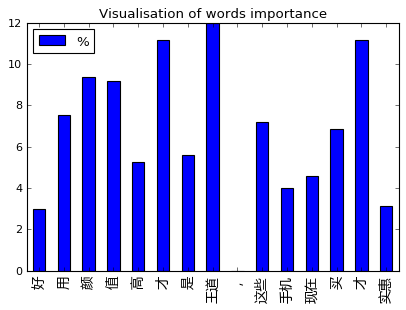

In [11]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

argmax_encode [[ 0.12639166  0.44005096  0.380337    0.32803121  0.04644742  0.22132875
  -0.05209386  0.05269207  0.55112058  0.35874328  0.17884588  0.35463464
   0.1810452  -0.0621911   0.07866827  0.24424855  0.44932926  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.12639166, 0.44005096, 0.380337, 0.32803121, 0.046447419, 0.22132875, 0, 0.052692071, 0.55112058, 0.35874328, 0.17884588, 0.35463464, 0.1810452, 0, 0.078668274, 0.24424855, 0.44932926] 3.99191474915 17
比信用卡分期更划算！有身份

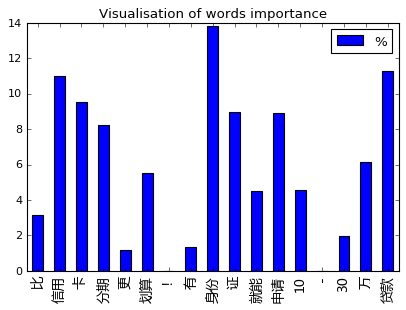

argmax_encode [[ 0.09273522  0.06153001  0.46381554  0.33655629  0.48978609  0.121961
   0.14596146 -0.01880611  0.1880037  -0.03479811  0.08501908  0.00810458
   0.11976437  0.03449473  0.07549777  0.06588431 -0.02135907  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.092735216, 0.061530009, 0.46381554, 0.33655629, 0.48978609, 0.121961, 0.14596146, 0, 0.1880037, 0, 0.085019082, 0.0081045805, 0.11976437, 0.034494728, 0.075497769, 0.065884314, 0] 2.28911415022 17
1890元往返飞旧金山?真是赚了,我一直在这里买!

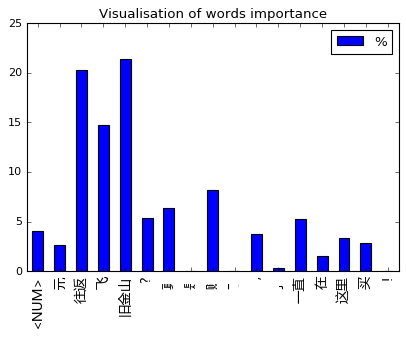

argmax_encode [[ 0.10565714  0.19285251  0.12672652  0.42898116  0.46054289  0.21071354
   0.38319063 -0.03990787  0.35549149  0.44157243  0.38040057  0.04177607
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.10565714, 0.19285251, 0.12672652, 0.42898116, 0.46054289, 0.21071354, 0.38319063, 0, 0.35549149, 0.44157243, 0.38040057, 0.041776069] 3.12790493667 12
这才是上班族修本科的正确打开方式！


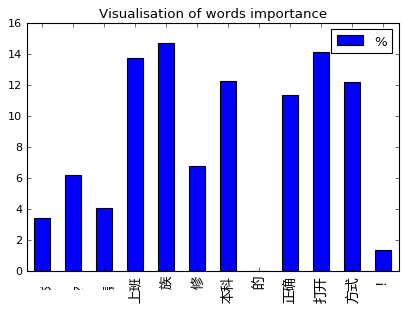

In [12]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

argmax_encode [[ 0.0205383   0.07419209  0.09162632 -0.00238859 -0.09789929  0.43615156
   0.41136557  0.04729296  0.04372116  0.13311949  0.53386962  0.07417542
   0.12945181  0.38769162  0.26357865  0.34530774  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.020538297, 0.074192092, 0.091626324, 0, 0, 0.43615156, 0.41136557, 0.047292955, 0.043721162, 0.13311949, 0.53386962, 0.074175417, 0.12945181, 0.38769162, 0.26357865, 0.34530774] 2.99208231643 16
国庆到成都不要住酒店啦,这些民宿带你领

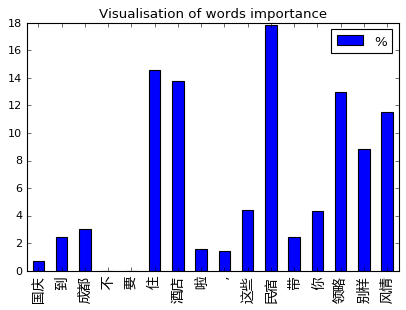

argmax_encode [[ 0.67473042  0.25466883  0.24890655  0.06633061  0.10241006  0.13177711
   0.67473042  0.3075681   0.40693951  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.67473042, 0.25466883, 0.24890655, 0.066330612, 0.10241006, 0.13177711, 0.67473042, 0.3075681, 0.40693951] 2.86806 9
低头玩手机?不如低头学英语


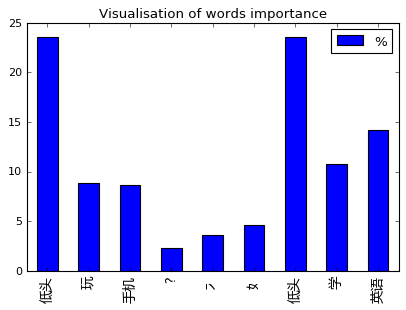

argmax_encode [[ 0.256302   -0.02995565  0.14594769  0.34645766  0.12609524  0.09851245
   0.13711461  0.17519136  0.02066859 -0.01358052  0.05870547  0.11024214
  -0.02995565  0.18414423  0.18307251  0.06347735  0.07886919  0.00675654
  -0.05377525  0.18845457  0.29743367  0.13873637 -0.01358052  0.19760668
   0.06385701 -0.03489698  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.256302, 0, 0.14594769, 0.34645766, 0.12609524, 0.098512448, 0.13711461, 0.17519136, 0.020668592, 0, 0.058705471, 0.11024214, 0, 0.18414423, 0.18307251, 0.063477352, 0.078869186, 0.0067

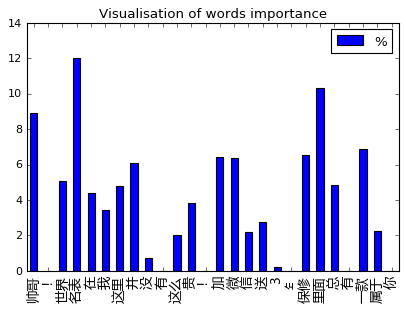

argmax_encode [[ 0.05517089  0.5702917   0.03668108  0.19530925  0.03668108  0.67477202
   0.25426036  0.07646972  0.54418743  0.08322197  0.06118544  0.66714317
   0.12430748  0.16517287  0.03798844  0.67477202 -0.07098613  0.41329715
   0.09974962  0.44770434  0.54418743  0.11585857  0.25526264  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.055170886, 0.5702917, 0.036681078, 0.19530925, 0.036681078, 0.67477202, 0.25426036, 0.076469719, 0.54418743, 0.083221972, 0.061185442, 0.66714317, 0.12430748, 0.16517287, 0.037988439, 0.67477202

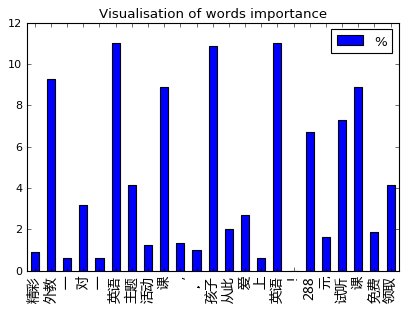

In [13]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

argmax_encode [[ 0.26914167  0.13371417  0.3555674   0.11094457  0.17535892  0.00738594
   0.3555674   0.37786481  0.18724412  0.17346005  0.08658662  0.08670147
   0.05594498  0.01139639 -0.03571182 -0.02732409  0.05186939  0.01800574
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.26914167, 0.13371417, 0.3555674, 0.11094457, 0.17535892, 0.0073859449, 0.3555674, 0.37786481, 0.18724412, 0.17346005, 0.086586624, 0.086701468, 0.055944979, 0.011396389, 0, 0, 0.051869389, 0.018005744] 2.45675

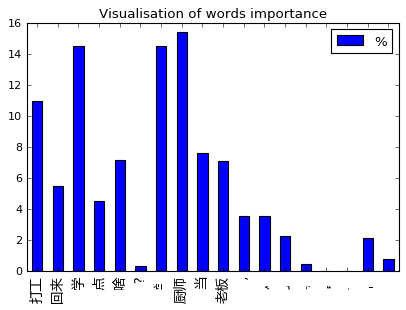

argmax_encode [[ 0.50002646  0.38565162  0.11993721  0.20706347  0.30118388  0.41853577
   0.11993721  0.45775956  0.34613729  0.35165307  0.00332027  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.50002646, 0.38565162, 0.11993721, 0.20706347, 0.30118388, 0.41853577, 0.11993721, 0.45775956, 0.34613729, 0.35165307, 0.0033202721] 3.21121 11
水饺加盟,无需厨师,总部扶持创业!


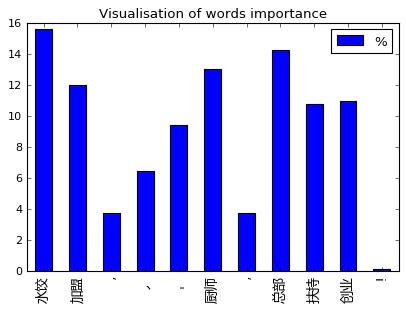

argmax_encode [[ 0.50868762  0.39149165  0.09542803  0.22456133  0.3059231   0.42377493
   0.09542803  0.46891212  0.35486194  0.34952101  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.50868762, 0.39149165, 0.095428035, 0.22456133, 0.3059231, 0.42377493, 0.095428035, 0.46891212, 0.35486194, 0.34952101] 3.21859 10
水饺加盟,无需厨师,总部扶持创业


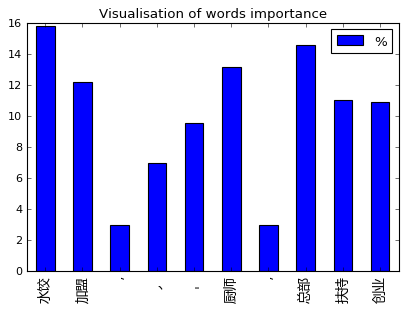

In [14]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

argmax_encode [[ 0.31934786  0.40524361  0.2952745   0.18004945  0.09106921  0.29594114
   0.08856916  0.1461879   0.26263767  0.01860002  0.35455713  0.04687194
   0.00900629  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.31934786, 0.40524361, 0.2952745, 0.18004945, 0.091069207, 0.29594114, 0.088569164, 0.1461879, 0.26263767, 0.018600019, 0.35455713, 0.046871938, 0.0090062926] 2.51336 13
iPhone隐藏功能：高铁也能在线选座了！


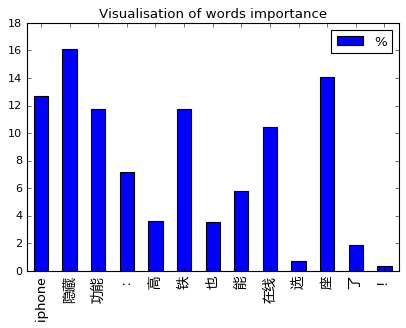

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [16]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.31934792]


array([ 0.31934792], dtype=float32)

In [17]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.31837016]


array([ 0.31837016], dtype=float32)

In [18]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '选座')

[ 0.32938731]


array([ 0.32938731], dtype=float32)

In [19]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.47614408]


array([ 0.47614408], dtype=float32)

argmax_encode [[ 0.29720131  0.44639617  0.22141534  0.49771225  0.4209739  -0.04986207
   0.42439955  0.24772668  0.04197407  0.23774303 -0.04986207  0.12423474
   0.38438526  0.18091798  0.02765558  0.49771225  0.20315707  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.29720131, 0.44639617, 0.22141534, 0.49771225, 0.4209739, 0, 0.42439955, 0.24772668, 0.041974071, 0.23774303, 0, 0.12423474, 0.38438526, 0.18091798, 0.027655585, 0.49771225, 0.20315707] 4.25360519625 17
携手欧歌步

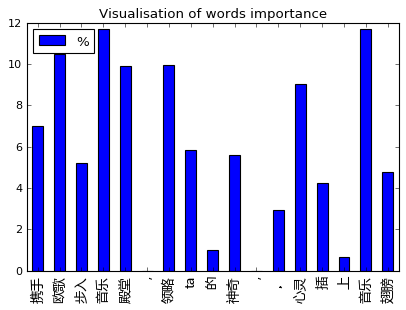

In [20]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

argmax_encode [[ 0.52321965  0.60823095  0.12969095  0.38414001  0.36007822  0.28429335
   0.04493186  0.07642768  0.08251404  0.07642768  0.60823095  0.28429335
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.52321965, 0.60823095, 0.12969095, 0.38414001, 0.36007822, 0.28429335, 0.044931859, 0.076427676, 0.08251404, 0.076427676, 0.60823095, 0.28429335] 3.46248 12
巨人游泳五星级酒店培训,一对一游泳培训


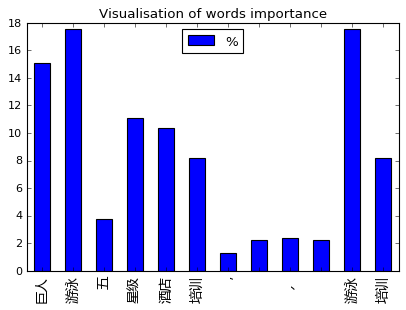

In [21]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

argmax_encode [[ 0.48249099  0.36483163  0.46461064  0.12399383  0.1908471  -0.01460669
   0.1926787  -0.01264727  0.12592053  0.04856122  0.12332298  0.0621838
   0.09909305  0.07761186 -0.0008772   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.48249099, 0.36483163, 0.46461064, 0.12399383, 0.1908471, 0, 0.1926787, 0, 0.12592053, 0.048561223, 0.12332298, 0.062183805, 0.09909305, 0.077611864, 0] 2.3561463356 15
往返飞旧金山?真是赚了,我一直在这里买!


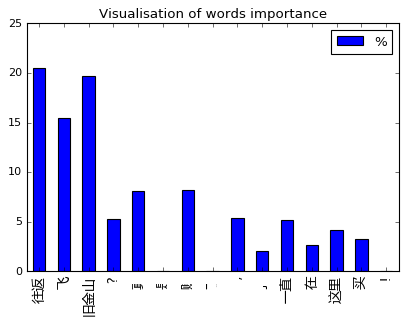

In [22]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

argmax_encode [[ 0.04471871  0.0029417   0.58827651  0.51586592  0.04131623  0.17523393
   0.04288463  0.69463152  0.17102641  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.044718709, 0.002941696, 0.58827651, 0.51586592, 0.04131623, 0.17523393, 0.042884629, 0.69463152, 0.17102641] 2.2769 9
不要住酒店，这里的民宿好


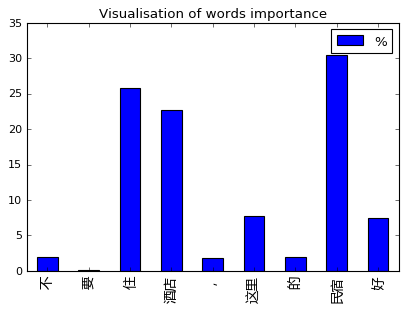

In [23]:
predict('不要住酒店，这里的民宿好')

argmax_encode [[ 0.04471869  0.0029417   0.58827645  0.6946314   0.04131622  0.17523393
   0.0428846   0.5158658   0.17102642  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.044718694, 0.0029417044, 0.58827645, 0.6946314, 0.041316222, 0.17523393, 0.042884603, 0.5158658, 0.17102642] 2.2769 9
不要住民宿，这里的酒店好


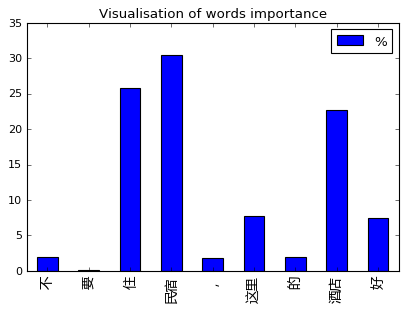

In [24]:
predict('不要住民宿，这里的酒店好')

argmax_encode [[ 0.21023053  0.26130587  0.28678945  0.18699801  0.43719327 -0.07061402
   0.02634483  0.1793716   0.11509234  0.09519114  0.14988622 -0.07061402
   0.29245049  0.1060168   0.07538739  0.27829641  0.16357189  0.09519114
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.21023053, 0.26130587, 0.28678945, 0.18699801, 0.43719327, 0, 0.026344832, 0.1793716, 0.11509234, 0.095191143, 0.14988622, 0, 0.29245049, 0.1060168, 0.075387388, 0.27829641, 0.16357189, 0.095191143] 2.959317

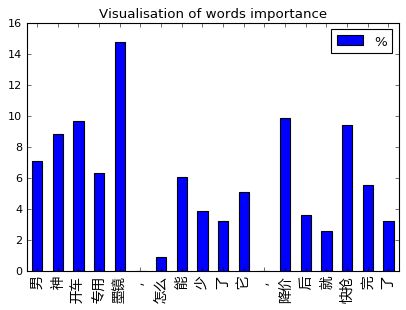

In [25]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

argmax_encode [[-0.00218879  0.11241374  0.34966516  0.32350776  0.3913967   0.31145734
   0.1821239   0.01690421 -0.00509512  0.18583369  0.15646172  0.11241374
   0.28072324  0.21996616  0.24868988  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[59, 5, 22092, 5705, 3781, 914, 326, 7, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0, 0.11241374, 0.34966516, 0.32350776, 0.3913967, 0.31145734, 0.1821239, 0.016904213, 0, 0.18583369, 0.15646172, 0.11241374, 0.28072324, 0.21996616, 0.24868988] 2.891557239 15
我的家乡惠州越来越热,选一款喜欢的墨镜很重要


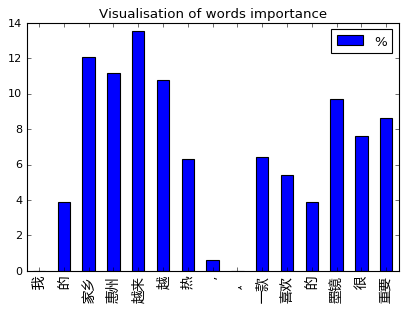

In [26]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

In [27]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.68136454]


array([ 0.68136454], dtype=float32)

In [28]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.57753366]


array([ 0.57753366], dtype=float32)

In [29]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.57753372]


array([ 0.57753372], dtype=float32)

In [30]:
top_words('往返')

往返:1.000000 套票:0.573718 1900:0.496703 单程:0.475526 机票:0.422958 旧金山:0.414719 旅游:0.400329 清迈:0.395952 护照:0.393171 旅行:0.390172 5288:0.386823 拱:0.386772 488:0.384538 曼谷:0.382669 出发:0.378047 国航:0.374488 出团:0.367679 1080:0.366550 5999:0.358530 双十:0.355454 中青旅:0.355380 南湖:0.351129 飞:0.347784 游:0.346259 160:0.344558 芭提雅:0.341838 海岛:0.340083 新山:0.339038 想飞:0.335932 双城:0.330783 洋服:0.330673 古镇:0.330232 国旅:0.327105 爬坡:0.326912 洛杉矶:0.326543 直飞:0.326276 越南:0.324116 华盛顿:0.322350 东京:0.322210 行程:0.319172 跳水:0.318312 迪斯尼:0.313541 航线:0.313113 澳门:0.312899 遨游:0.311414 西藏:0.309952 签证:0.308783 加州:0.308125 直达:0.306385 新加坡:0.306325 邮轮:0.305593 1999:0.305098 咫尺:0.304909 景点:0.304083 九寨沟:0.302591 甲米:0.301957 出境:0.300108 设有:0.299675 专列:0.297987 安提瓜:0.297260 普吉:0.296183 错峰:0.296076 布吉:0.294233 滦州:0.294219 1350:0.293825 季节:0.292922 泰国:0.290892 hkd:0.290856 388:0.289265 海景:0.289263 几十:0.288521 c1:0.288330 2199:0.287181 穷游:0.286171 假期:0.284203 帆船:0.283193 亚太:0.282307 wuli:0.280522 桂林:0.280077 畅游:0.279027 勿入:0.278659 津:

In [31]:
top_words('民宿')

民宿:1.000000 格雷斯:0.439977 收买:0.431699 旅馆:0.418493 公寓:0.418139 住:0.401146 平谷:0.401085 订房:0.391600 尾盘:0.376693 酒店:0.368662 芭提雅:0.364177 滦州:0.363023 梵高:0.358237 大鹏:0.355917 23000:0.348305 5300:0.348125 一隅:0.342664 芳香:0.341190 讨论:0.333697 府邸:0.332117 开往:0.329870 房:0.329690 107:0.326965 客栈:0.326221 连绵:0.326008 375:0.325574 古城:0.324854 优游:0.324032 小城:0.321474 airbnb:0.320798 银滩:0.318879 loft:0.318732 御园:0.317897 效劳:0.317513 8100:0.317335 万汇:0.315869 暖冬:0.315203 金翔:0.314768 帕克:0.314767 置业:0.313784 房子:0.312608 歇:0.311796 主城:0.310316 装好:0.309822 遨游:0.309644 旅行:0.309504 间:0.307987 路途:0.307832 租房:0.307682 两居:0.306173 泳池:0.305855 偷闲:0.305830 日本:0.305775 正序:0.304674 滨江:0.304550 住宿:0.302990 格拉斯哥:0.300056 白鹭:0.299764 荏:0.299278 边陲:0.299151 遮住:0.298860 137:0.298850 南湖:0.298805 游神:0.298558 途:0.298510 西二旗:0.298269 选房:0.297910 查找:0.297440 一坐:0.297202 分隔:0.296178 国旅:0.295953 假期:0.295887 中房:0.295884 马来西亚:0.295608 113:0.295544 展馆:0.295124 187:0.294153 17000:0.293916 旅游:0.293278 订:0.292944 西藏:0.291649 东京:0.29

In [32]:
top_words('酒店')

酒店:1.000000 布草:0.431792 同里:0.423453 住宿:0.405749 宾馆:0.398362 公寓:0.387928 民宿:0.368662 1700:0.357682 订房:0.355418 携程:0.351898 平谷:0.349464 情侣:0.347287 糊涂:0.344521 房:0.343531 度假:0.340360 格雷斯:0.338044 芭提雅:0.333129 喜来登:0.331968 马代:0.329869 浪漫:0.319158 住:0.317275 会所:0.316855 婚宴:0.316835 阳春:0.311958 置业:0.310777 旅馆:0.309610 开张:0.302814 计价:0.300686 七彩堂:0.299669 水疗:0.299594 间:0.299295 湖景:0.298164 三大:0.297292 金翔:0.297077 布置:0.296886 赏花:0.296243 吉隆坡:0.296134 舒舒:0.293954 样板:0.292274 恺:0.292216 尾盘:0.292075 花园:0.291891 汾阳:0.291348 蓝调:0.289812 o2:0.288527 康体:0.287905 芽庄:0.287689 内环:0.287501 订婚:0.286946 天赐:0.286660 租借:0.286189 两厅:0.286127 主题:0.286006 展会:0.285956 院:0.285943 白鹭:0.285593 游艇:0.285419 一坐:0.285383 桑拿:0.285147 亨通:0.284009 科勒:0.283908 夏威夷:0.283599 策划:0.283200 候鸟:0.282014 装修:0.281524 影吧:0.280490 107:0.280421 康宝:0.279791 古兰:0.279144 喜悦:0.279090 泳池:0.278645 住进:0.278362 要素:0.276583 勘查:0.276108 逛街:0.275369 婚庆:0.275150 府邸:0.273708 ≤:0.273221 8对1:0.273120 小城:0.272853 吃喝:0.272549 雅诗阁:0.272409 婚礼:0.272305

In [33]:
top_words('旧金山')

旧金山:1.000000 加州:0.535295 情迷:0.527957 峡谷:0.470436 华盛顿:0.441415 往返:0.414718 古镇:0.404853 美西:0.402268 景点:0.400864 滦州:0.398030 旅游:0.391458 出团:0.382838 景美:0.379273 曼谷:0.378066 单程:0.375115 洛杉矶:0.374109 1900:0.373650 新山:0.371281 新加坡:0.370102 九寨沟:0.369009 迪斯尼:0.368265 旅行:0.367963 穷游:0.365425 蜜柚:0.363175 专列:0.360425 绿地:0.358262 488:0.357334 泳池:0.351614 马坊:0.351359 中青旅:0.348726 套票:0.348100 甲米:0.345738 机票:0.344817 公园:0.344172 同程:0.341291 游:0.338283 龙脉:0.335043 乡村:0.334915 咫尺:0.333745 国旅:0.332318 假期:0.331913 优游:0.331114 海景:0.329529 布吉:0.329385 湿地:0.328873 古城:0.325970 妞:0.325728 邻近:0.324606 芬兰:0.324467 niton:0.323090 南湖:0.323072 神舟:0.322726 service:0.320981 小人儿:0.320688 温泉:0.320046 尼采:0.317309 南沙:0.316043 浮潜:0.315292 度假:0.314605 温水:0.314390 770:0.314344 187:0.314284 文教:0.314180 lan:0.313915 酒屋:0.313848 嘉汇:0.313584 漫游:0.313015 7800:0.312223 拱:0.311815 暑期:0.311517 花园:0.311119 泰国:0.310892 国航:0.310340 播撒:0.310120 天游:0.310087 迪拜:0.309148 五国:0.308863 160:0.307820 清迈:0.307335 附件:0.306156 九寨:0.305014 涠:0.30

In [34]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

越来:0.391397 家乡:0.349665 惠州:0.323508 越:0.311457 墨镜:0.280723 重要:0.248690 导电:0.223014 很:0.219966 越理:0.207899 荼明:0.207354 祸:0.203197 等等:0.200028 扎堆:0.198120 过敏:0.196695 当当:0.195109 脸部:0.194560 多半:0.191485 越多:0.186943 一款:0.185834 呀:0.185552 惹:0.185061 热:0.182124 想说:0.180769 上去:0.180512 散发:0.179210 oem:0.179117 回事:0.179080 睛彩:0.178651 120:0.178297 色斑:0.176522 歌:0.175461 年头:0.175229 燕窝:0.175189 扩:0.173645 前送:0.173252 感光:0.172775 赛思特:0.172023 snow:0.171178 脸蛋:0.171166 o:0.171060 色素:0.170785 芭:0.169440 食欲:0.168968 古风:0.165258 湖山:0.164864 2aa:0.164609 实地:0.164216 利特:0.163753 严重:0.163586 甩手:0.162651 来达:0.162597 耳钉:0.162099 湉吉:0.161888 联创:0.161850 会社:0.161832 模思:0.161661 专供:0.161520 130:0.161516 好美:0.160671 摇:0.160558 补水:0.160121 考验:0.160009 众联:0.159372 氰:0.159361 虚弱:0.158782 mage:0.158711 可能:0.158510 加力:0.158391 times:0.158304 烧制:0.157877 磕:0.157690 分散:0.156617 晒斑:0.156613 防污:0.156540 喜欢:0.156462 达克罗:0.156399 受热:0.155421 长效:0.155348 宰:0.155328 猪仔:0.155301 和兴:0.155173 橡:0.154995 薪金:0.154796 美甲:0.1

In [35]:
top_words('眼镜')

眼镜:1.000000 出汗:0.518909 防滑:0.487852 滑落:0.416358 配:0.406456 镜片:0.393415 狂甩:0.372083 滑:0.366629 配戴:0.355486 打球:0.340406 配镜:0.336946 依视路:0.333853 loho:0.332791 框:0.327666 华德:0.320280 蓝牙:0.320239 极轻:0.317535 耳机:0.316262 作用:0.311327 吸油:0.310747 划痕:0.308647 平果:0.302567 节食:0.298671 镜架:0.297119 纸:0.292442 金奥:0.291665 239:0.291230 妹:0.288150 工字钢:0.285683 登山:0.285429 听歌:0.285074 轻:0.284561 磨损:0.284496 硅胶:0.283947 转给:0.282981 钥匙:0.281529 流汗:0.281108 木纹:0.280653 入耳:0.280328 多美:0.279954 内裤:0.278790 出卖:0.278202 l:0.277937 咬合:0.277064 滑板:0.276143 网膜:0.275459 至高:0.274584 跑步:0.273339 翰宇:0.272892 透气:0.272474 兜里:0.270975 机身:0.269999 薄:0.269520 牙签:0.269201 尼龙:0.268727 热熔:0.265446 鲱:0.264928 线控:0.264338 胸:0.263429 视界:0.262968 3mm:0.262882 烦人:0.261127 验光:0.261100 摘掉:0.259779 复古:0.259665 龍:0.258926 卡龙:0.258127 复合:0.257973 馅饼:0.257965 毫安:0.256400 上镜:0.256210 不勒:0.255734 大号:0.255482 exe:0.255273 中凯:0.255115 拷:0.255000 水分:0.254601 蜂窝:0.254182 健:0.254041 板材:0.254039 呱呱:0.253164 圆形:0.253137 颈:0.252538 变色:0.252149

In [36]:
top_words('nike')

nike:1.000000 耐克:0.517121 富润:0.359758 com:0.358085 振雄:0.333216 air:0.331078 aj:0.328044 正品:0.327536 徕卡:0.315466 三叶:0.312143 洗护:0.311620 三双:0.309234 相机:0.304299 一千多:0.302691 机芯:0.301728 专卖:0.300913 惠普:0.299383 汽配:0.298587 wms:0.296826 气垫:0.295988 新上市:0.291115 春夏:0.290516 买比:0.288643 红人:0.288195 车标:0.285967 中车:0.285350 里程:0.285155 全线:0.284680 惠达:0.284051 傲世:0.283111 ree:0.282691 1309:0.282253 benro:0.281639 蓝牙:0.281305 导航:0.280600 藝:0.280503 gox:0.278927 daniel:0.277773 耳机:0.277623 铁路:0.276633 bonz:0.275545 gl:0.275116 v:0.275092 户外:0.272865 立森:0.272409 像样:0.272013 专柜:0.271307 军用:0.270721 渐变:0.270335 轿:0.270081 洗漱:0.269027 音质:0.268909 刮刮:0.268535 迅:0.268459 捷宝:0.268248 bmw:0.266948 gia:0.266888 tfo:0.266799 步频:0.266701 車:0.266325 米诺:0.266047 必备:0.264035 伴侣:0.263770 营收:0.262789 远投:0.261325 跑步:0.260469 科特:0.259809 zenlayer:0.259350 i3:0.258868 首汽:0.258559 双:0.258230 捷:0.257981 汐:0.257944 免税:0.257476 车库:0.257398 百诺:0.257076 外形:0.256950 机身:0.256362 清障:0.256087 蓝牌:0.255636 123:0.255489 www:0.

In [37]:
top_words('耐克')

耐克:1.000000 nike:0.517121 名表:0.412271 阿迪:0.392329 三双:0.384546 专柜:0.337386 名牌:0.325429 宁花:0.312191 高傲:0.312005 外星:0.303285 音质:0.303250 正品:0.301767 鞋:0.300965 但:0.294518 15mm:0.292761 这块:0.291138 盲目:0.288710 上次:0.288365 高贵:0.286643 大厦:0.285859 饭桌:0.285113 nas:0.282986 送友:0.281288 296:0.279231 表:0.277868 邓禄普:0.277708 地摊:0.277505 氙:0.276355 双:0.274358 百多:0.272813 逛:0.270671 送亲:0.269620 忍痛:0.269244 车库:0.269095 金杯:0.268090 一万:0.268062 金面:0.267107 姻:0.266411 已经:0.266307 梯田:0.266112 da:0.265893 机车:0.265433 临平:0.265317 惠达:0.265179 同庆:0.263991 亚欧:0.263221 对讲:0.263142 油价:0.261145 分量:0.260244 398:0.259530 169:0.259044 千多:0.258573 usb:0.257220 阅:0.257182 债:0.257108 唯一:0.256681 手表:0.256601 太早:0.256585 双边:0.255751 频:0.255371 一千多:0.254231 买到:0.254135 崛:0.253701 游轮:0.253586 gox:0.253572 蓝牙:0.253298 槛:0.252704 机芯:0.252375 1350:0.250944 抢到:0.250506 三百多:0.250174 硒:0.249297 耳机:0.248827 晖:0.248518 包赔:0.248482 只用:0.247923 苹:0.246849 惠普:0.246639 长江:0.246129 茫:0.244884 闪闪:0.244751 自行:0.243636 美能达:0.243560 mini

In [38]:
top_words('沧州')

沧州:1.000000 河源:0.500933 嘉兴:0.495096 台州:0.486615 周口:0.485972 呼和浩特:0.484116 赣州:0.481353 济南:0.477445 泸州:0.475729 海口:0.470402 兴安:0.464440 内江:0.464098 菏泽:0.449163 汕尾:0.448522 衢州:0.441510 十堰:0.441302 本溪:0.439306 盐城:0.437490 德阳:0.436330 保定:0.431475 信阳:0.429871 文山:0.428877 抚顺:0.426149 铁岭:0.425136 福州:0.424761 延边:0.422509 南阳:0.421361 南昌:0.417846 重庆:0.417658 温州:0.413214 泰州:0.412995 潍坊:0.409335 青岛:0.408654 宝鸡:0.403671 黔:0.401814 自贡:0.401777 滨州:0.401513 南京:0.401495 阜新:0.401072 舟山:0.401044 桩基:0.399510 南充:0.395286 哈尔滨:0.395104 鑫宜达:0.394877 佛山:0.392375 乌鲁木齐:0.390913 无锡:0.388062 廊坊:0.382844 东莞:0.382412 仙桃:0.380568 镇江:0.380128 南宁:0.379325 西宁:0.376183 开封:0.375088 濮阳:0.374010 聊城:0.373090 珠海:0.372190 贺州:0.371429 眉山:0.369211 抚州:0.364291 济宁:0.360407 东南:0.358923 郑州:0.355358 宁波:0.354069 邯郸:0.351799 湛江:0.350123 莆田:0.348565 邢台:0.347478 许昌:0.345655 商丘:0.342022 遂宁:0.341576 绵阳:0.339596 鞍山:0.337638 大庆:0.335680 大连:0.335368 烟台:0.334759 欧佩克:0.334325 常州:0.332796 包头:0.331421 昆明:0.330918 毕节:0.330323 安阳:0.330273 徐州:0.33000

In [39]:
top_words('电视')

电视:1.000000 彩电:0.475326 液晶:0.461955 盒子:0.417763 kuset:0.380900 广播:0.380743 天线:0.336261 did:0.334809 屏:0.330243 显示:0.325519 机顶:0.324060 斯斐德:0.317285 两用:0.309601 步频:0.292548 寰:0.292536 phone:0.292189 赛鸽:0.291180 冰箱:0.289559 hdid:0.289399 电影:0.288865 闪光:0.288337 华邦:0.286195 拆机:0.284279 6gb:0.283974 荧:0.282071 剧:0.281538 拼接:0.281449 广告:0.279524 幕布:0.279222 韵意:0.278412 lkk:0.277790 年会:0.277024 tvc:0.276574 坐:0.276527 凯帕斯:0.273817 亚美:0.273379 投影:0.273379 视:0.272245 灏:0.271045 灯箱:0.270245 旺龙:0.262741 维修:0.261714 影视:0.260138 媒体:0.259670 开机:0.259331 if:0.258107 4l:0.257973 天笔:0.257675 悬:0.256783 菲尼特:0.256078 飞飞:0.254643 触摸:0.253436 熟食:0.253252 杞:0.253123 禁忌:0.251655 @:0.249746 眙:0.249674 制作:0.249123 清晰:0.247539 视听:0.247043 衢:0.247017 脚架:0.246995 浩宇:0.246693 音乐:0.246174 鉴赏:0.245899 门禁:0.245306 萤火:0.245223 普天:0.244622 灯杆:0.244532 ued:0.243592 中控:0.243095 网点:0.242840 同心:0.241923 艾普:0.241658 吵:0.241601 超薄:0.241482 喷泉:0.241459 静:0.241098 worth:0.240903 歌:0.240848 传媒:0.240801 外型:0.239774 驿站:0.239668 

In [40]:
top_words('帅哥')

帅哥:1.000000 黄皮:0.347903 一边:0.343132 单身:0.320414 网吧:0.314316 瞎眼:0.311871 新思路:0.305477 打磨:0.297112 妹:0.293738 哇:0.288982 聊天:0.287640 斯斐德:0.285290 证卡:0.284317 当年:0.283693 18k:0.282804 痘痘:0.281218 美女:0.280501 绑:0.279477 唇妆:0.275746 仙:0.274787 睡着:0.274221 谋士:0.273367 大龄:0.273293 空姐:0.271558 合体:0.271407 全保:0.270680 合集:0.268575 甚:0.267954 小心:0.265293 咬:0.264004 镶:0.262183 包夜:0.261238 精雕:0.259149 骨骼:0.256742 妹子:0.255445 颜:0.253312 水嫩:0.251760 麻:0.251592 男:0.250879 呵呵:0.250583 念念:0.250223 见底:0.249569 恶魔:0.249493 笈:0.248776 马路:0.248310 95:0.247254 主播:0.246938 挎:0.246508 对待:0.246431 白熊:0.246156 孙子:0.244747 big:0.244643 tantan:0.244450 小说:0.244397 血饮:0.244174 腊:0.244012 好闻:0.243004 火花:0.241781 英美:0.241661 真价:0.241505 斩首:0.241377 女:0.241266 唇膏:0.241219 闯过:0.240751 烦人:0.239932 披靡:0.239499 痕:0.238221 细算:0.237671 低估:0.237425 萌:0.237028 high:0.236875 未有:0.236545 结识:0.236347 组队:0.236246 撒娇:0.236203 地网:0.236020 看花:0.235611 os:0.234995 牙套:0.234398 复活:0.234293 害死:0.234200 hera:0.234085 嗖:0.234018 弃:0.23333

In [41]:
top_words('500块在这APP能买三双nike！还包邮！老婆夸我会省钱！')

三双:0.587195 邮:0.433226 包:0.392076 百多:0.384040 169:0.369974 高傲:0.355579 三百多:0.354042 夸:0.353389 开春:0.351412 aj:0.349252 鞋都:0.342561 脱皮:0.329104 阿迪:0.328597 专柜:0.321435 耐克:0.318287 鞋:0.314220 得体:0.313760 耐穿:0.303925 原单:0.300244 nike:0.298438 bllp:0.296636 上身:0.293559 松软:0.286107 买:0.284798 已售:0.282885 亲眼:0.281238 一两百:0.275697 轨迹:0.271372 一千多:0.270269 走时:0.269720 198:0.269568 多几:0.263811 皮靴:0.263449 她说:0.262753 双:0.262283 毛皮:0.260315 cucci:0.259942 皮衣:0.258234 格子:0.258074 这时候:0.256419 一会:0.254143 真皮:0.252602 app:0.252560 国庆:0.252509 大牌:0.252440 小气:0.251469 巡山:0.248688 地摊:0.247289 变型:0.245311 邓禄普:0.244598 午间:0.244128 833:0.242577 老气:0.242318 次货:0.242031 绒裤:0.238960 脚臭:0.238860 ugg:0.238281 网购:0.237517 脚下:0.236912 气垫:0.236657 便宜:0.236283 驾车:0.236021 冰刀:0.235985 原配:0.235958 像样:0.235935 度过:0.235829 霸气:0.235761 豆豆:0.234389 起皱:0.232526 yy:0.232495 春夏:0.231444 太早:0.230874 正品:0.230355 牛皮:0.229960 送友:0.229575 折:0.228840 鞋子:0.228368 粉底:0.228149 父亲:0.227360 西裤:0.227319 三色:0.226814 以内:0.224335 流露:0.2

In [42]:
top_words('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

三双:0.587195 邮:0.433226 包:0.392076 百多:0.384040 169:0.369974 高傲:0.355579 三百多:0.354042 夸:0.353389 开春:0.351412 aj:0.349252 鞋都:0.342561 脱皮:0.329104 阿迪:0.328597 专柜:0.321435 耐克:0.318287 鞋:0.314220 得体:0.313760 耐穿:0.303925 原单:0.300244 nike:0.298438 bllp:0.296636 上身:0.293559 松软:0.286107 买:0.284798 已售:0.282885 亲眼:0.281238 一两百:0.275697 轨迹:0.271372 一千多:0.270269 走时:0.269720 198:0.269568 多几:0.263811 皮靴:0.263449 她说:0.262753 双:0.262283 毛皮:0.260315 cucci:0.259942 皮衣:0.258234 格子:0.258074 这时候:0.256419 一会:0.254143 真皮:0.252602 app:0.252560 国庆:0.252509 大牌:0.252440 小气:0.251469 巡山:0.248688 地摊:0.247289 变型:0.245311 邓禄普:0.244598 午间:0.244128 833:0.242577 老气:0.242318 次货:0.242031 绒裤:0.238960 脚臭:0.238860 ugg:0.238281 网购:0.237517 脚下:0.236912 气垫:0.236657 便宜:0.236283 驾车:0.236021 冰刀:0.235985 原配:0.235958 像样:0.235935 度过:0.235829 霸气:0.235761 豆豆:0.234389 起皱:0.232526 yy:0.232495 春夏:0.231444 太早:0.230874 正品:0.230355 牛皮:0.229960 送友:0.229575 折:0.228840 鞋子:0.228368 粉底:0.228149 父亲:0.227360 西裤:0.227319 三色:0.226814 以内:0.224335 流露:0.2

argmax_encode [[ 0.14381695  0.21630105  0.1286782   0.06639525  0.25256002  0.08211666
   0.28479773  0.58719486  0.29843795  0.07280312  0.12423732  0.39207566
   0.43322641  0.07280312  0.14209124  0.35338914 -0.01363278  0.11697298
   0.07292196  0.07280312  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 9489, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.14381695, 0.21630105, 0.1286782, 0.066395253, 0.25256002, 0.082116663, 0.28479773, 0.58719486, 0.29843795, 0.072803125, 0.12423732, 0.39207566, 0.43322641, 0.072803125, 0.14209124, 0.35338914, 0, 0.116972

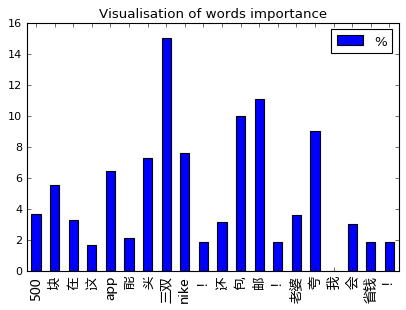

In [43]:
predict('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

argmax_encode [[ 0.17225429  0.23606886  0.14845873  0.05819415  0.25898731  0.07701632
   0.2856946   0.59872293  0.40074065  0.08994006  0.13523522  0.38393784
   0.43439054  0.08994006  0.15401679  0.36915547 -0.02912907  0.13395609
   0.06511355  0.08994006  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 8221, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.17225429, 0.23606886, 0.14845873, 0.058194153, 0.25898731, 0.077016316, 0.2856946, 0.59872293, 0.40074065, 0.089940064, 0.13523522, 0.38393784, 0.43439054, 0.089940064, 0.15401679, 0.36915547, 0, 0.133956

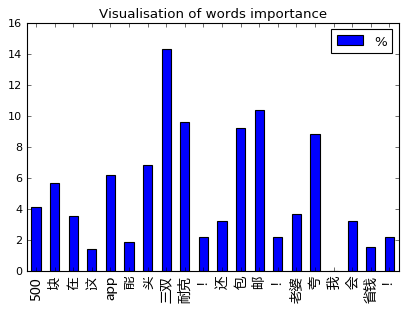

In [44]:
predict('500块在这APP能买三双耐克！还包邮！老婆夸我会省钱！')